# 14 October 2021

## **Latihan Time Series (ARIMA)**

**Gunakan dataset AirPassengers**

1. Lakukan EDA.
2. Cek apakah data sudah stasioner? Jika belum, lakukan differencing.
3. Gunakan ADF test untuk mengecek stasioneritas data secara perhitungan statistik.
4. Cari model ARIMA terbaik melalui grafik ACF & PACF.
5. Buat modelnya dan lakukan forecasting untuk periode 1 tahun.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from datetime import datetime

import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AirPassengers.csv')
df

,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121
...,...,...
139,8/1/1960,606
140,9/1/1960,508
141,10/1/1960,461
142,11/1/1960,390


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TravelDate  144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
df = df.rename(columns={'TravelDate': 'Date'})

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df['Date'] = df['Date'].dt.date

## **EDA**

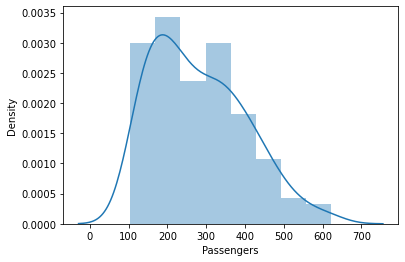

In [8]:
sns.distplot(df['Passengers']);

In [9]:
df['Passengers'].skew()

0.5831604861560892

In [10]:
import plotly.graph_objects as go

fig = go.Figure([go.Scatter(name='true', x=df['Date'], y=df['Passengers'])])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## **Stationarity**

**Cek stationarity dengan menggunakan adfuller test**

**Hypothesis untuk adfuller test:**

$H_0$: Data tidak stasioner

$H_1$: Data stasioner

In [13]:
adf = adfuller(df['Passengers'])
adf

(0.8153688792060569,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [14]:
adf = adfuller(df['Passengers'])
alpha = 0.05
if adf[1] <= alpha:
    print('Reject null hypothesis; The data is stationary')
else:
    print('Failed to reject null hypothesis; The data is not stationary')

Failed to reject null hypothesis; The data is not stationary


In [15]:
df_stationary = df.copy()

In [16]:
df_stationary['Passengers_Stationary'] = df_stationary['Passengers'].diff()
df_stationary['Passengers_Stationary_2'] = df_stationary['Passengers'].diff().diff()

In [17]:
df_stationary

,Date,Passengers,Passengers_Stationary,Passengers_Stationary_2
0,1949-01-01,112,NaN,NaN
1,1949-02-01,118,6.0,NaN
2,1949-03-01,132,14.0,8.0
3,1949-04-01,129,-3.0,-17.0
4,1949-05-01,121,-8.0,-5.0
...,...,...,...,...
139,1960-08-01,606,-16.0,-103.0
140,1960-09-01,508,-98.0,-82.0
141,1960-10-01,461,-47.0,51.0
142,1960-11-01,390,-71.0,-24.0


In [18]:
df_stationary = df_stationary.dropna()

In [19]:
df_stationary

,Date,Passengers,Passengers_Stationary,Passengers_Stationary_2
2,1949-03-01,132,14.0,8.0
3,1949-04-01,129,-3.0,-17.0
4,1949-05-01,121,-8.0,-5.0
5,1949-06-01,135,14.0,22.0
6,1949-07-01,148,13.0,-1.0
...,...,...,...,...
139,1960-08-01,606,-16.0,-103.0
140,1960-09-01,508,-98.0,-82.0
141,1960-10-01,461,-47.0,51.0
142,1960-11-01,390,-71.0,-24.0


In [20]:
adf_stat = adfuller(df_stationary['Passengers_Stationary'])
alpha = 0.05
if adf_stat[1] <= alpha:
    print('Reject null hypothesis; The data is stationary')
else:
    print('Failed to reject null hypothesis; The data is not stationary')

Failed to reject null hypothesis; The data is not stationary


In [21]:
adf_stat = adfuller(df_stationary['Passengers_Stationary_2'])
alpha = 0.05
if adf_stat[1] <= alpha:
    print('Reject null hypothesis; The data is stationary')
else:
    print('Failed to reject null hypothesis; The data is not stationary')

Reject null hypothesis; The data is stationary


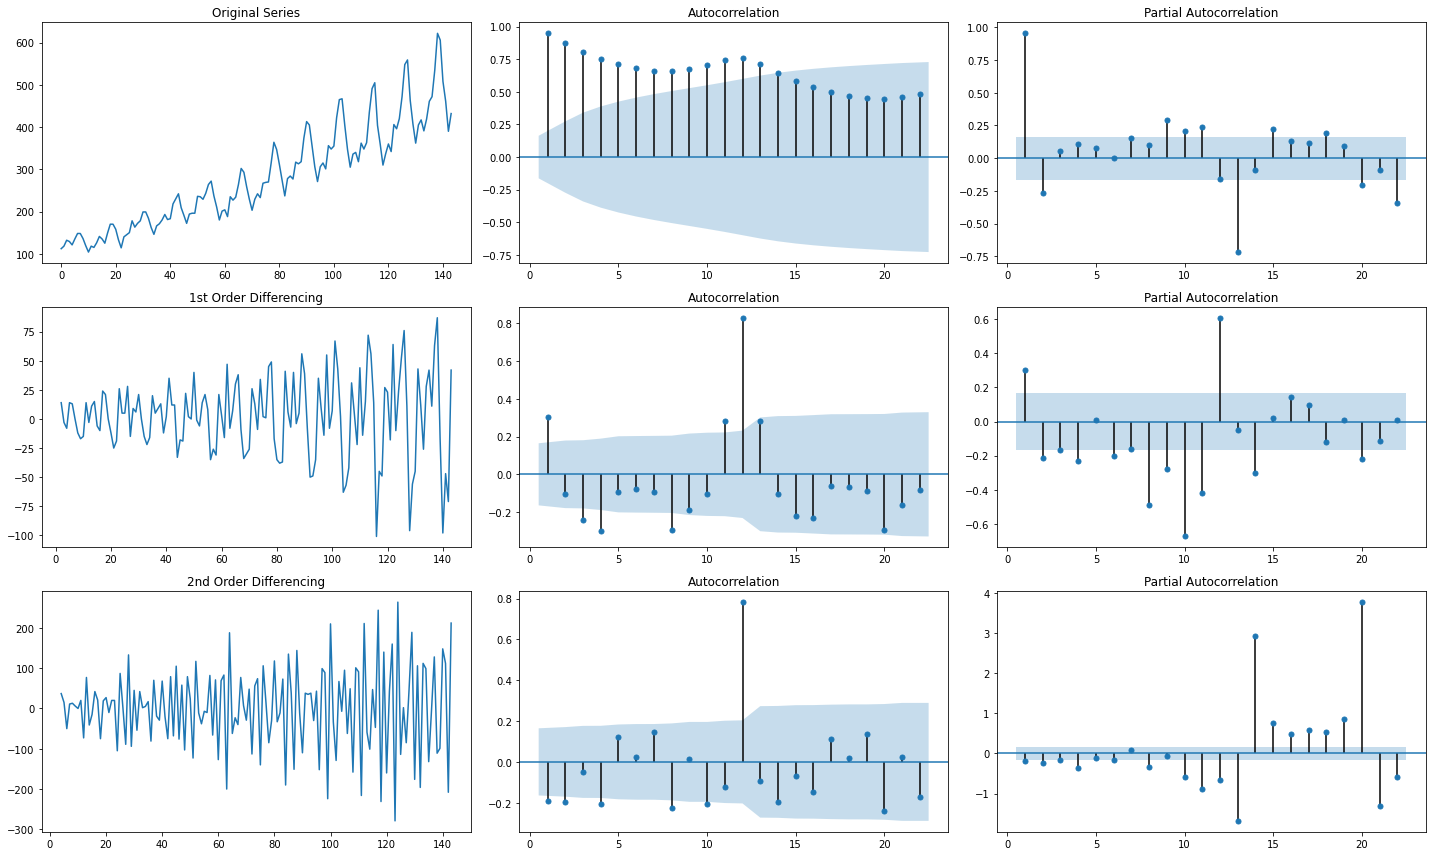

In [22]:
# Original Series
fig, axes = plt.subplots(3, 3, figsize = (20,12))
axes[0, 0].plot(df['Passengers']); axes[0, 0].set_title('Original Series')
plot_acf(df['Passengers'], ax=axes[0, 1], zero = False)
plot_pacf(df['Passengers'], ax=axes[0, 2], zero = False)

# 1st Differencing
axes[1, 0].plot(df_stationary['Passengers_Stationary']); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_stationary['Passengers_Stationary'].dropna(), ax=axes[1, 1], zero = False)
plot_pacf(df_stationary['Passengers_Stationary'].dropna(), ax=axes[1, 2], zero = False)

# 2nd Differencing
axes[2, 0].plot(df_stationary['Passengers_Stationary_2'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_stationary['Passengers_Stationary_2'].dropna(), ax=axes[2, 1], zero = False)
plot_pacf(df_stationary['Passengers_Stationary_2'].dropna(), ax=axes[2, 2], zero = False)

plt.tight_layout()
plt.show()

In [38]:
import pmdarima as pmd

arima_model = pmd.auto_arima(
    df_stationary['Passengers_Stationary_2'],
    start_p=1,
    start_q=1, trace=True,
)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1452.590, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1449.026, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1450.596, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1442.078, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1439.877, Time=0.12 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1421.694, Time=0.18 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=1422.097, Time=0.36 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1419.708, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1437.879, Time=0.07 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1420.111, Time=0

## **Modeling**

**Contoh kandidat model:**
1. ARIMA(2, 2, 2)
2. ARIMA(4, 2, 2)

In [24]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df['Passengers'], order = (2, 2, 2))
model_fit = model.fit()

In [25]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D2.Passengers   No. Observations:                  142
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -691.328
Method:                       css-mle   S.D. of innovations             30.953
Date:                Thu, 14 Oct 2021   AIC                           1394.656
Time:                        20:40:56   BIC                           1412.391
Sample:                             2   HQIC                          1401.863
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0043      0.087      0.049      0.961      -0.166       0.175
ar.L1.D2.Passengers    -0.4632      0.107     -4.349      0.000      -0.672      -0.254
ar.L2.D2.Passeng

In [26]:
model2 = ARIMA(df['Passengers'], order = (4, 2, 2))
model2_fit = model2.fit()
print(model2_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D2.Passengers   No. Observations:                  142
Model:                 ARIMA(4, 2, 2)   Log Likelihood                -683.629
Method:                       css-mle   S.D. of innovations             29.196
Date:                Thu, 14 Oct 2021   AIC                           1383.257
Time:                        20:40:56   BIC                           1406.904
Sample:                             2   HQIC                          1392.866
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0104      0.057      0.182      0.855      -0.102       0.123
ar.L1.D2.Passengers    -0.4079      0.109     -3.759      0.000      -0.621      -0.195
ar.L2.D2.Passeng

## **Forecasting**

In [27]:
forecast_length = 12
forecast_result = model2_fit.forecast(forecast_length)

In [28]:
print('Forecasted Value', forecast_result[0], '\n')
print('Forecasted SE', forecast_result[1], '\n')
print('Forecasted confidence interval', forecast_result[2])

Forecasted Value [496.07703789 508.46768206 527.2703163  498.9925717  493.63941877
 492.9124084  498.97169851 513.39969296 516.09629304 520.98302666
 520.49405202 521.96729768] 

Forecasted SE [ 29.19616312  50.47165764  62.87753657  71.1939002   74.71468487
  78.36534399  82.22025308  86.86633031  91.95739018  96.3750625
 100.4733443  104.04541963] 

Forecasted confidence interval [[438.85360969 553.30046609]
 [409.54505084 607.39031328]
 [404.03260917 650.50802342]
 [359.45509138 638.53005201]
 [347.2013273  640.07751023]
 [339.31915655 646.50566025]
 [337.82296368 660.12043334]
 [343.14481407 683.65457184]
 [335.86312017 696.32946591]
 [332.09137516 709.87467816]
 [323.56991579 717.41818826]
 [318.04202245 725.89257291]]


In [29]:
df.tail(13)

,Date,Passengers
131,1959-12-01,405
132,1960-01-01,417
133,1960-02-01,391
134,1960-03-01,419
135,1960-04-01,461
136,1960-05-01,472
137,1960-06-01,535
138,1960-07-01,622
139,1960-08-01,606
140,1960-09-01,508


In [30]:
Month = []

for i in range(1, forecast_length+1):
  Month.append('1961-'+str(i)+'-01')

In [31]:
df_forecast = pd.DataFrame({
    'Date': Month,
    'Passengers': forecast_result[0],
})

In [32]:
df_forecast['SE'] = forecast_result[1]
df_forecast['Lower Bound'] = forecast_result[2][:,0]
df_forecast['Upper Bound'] = forecast_result[2][:,1]
df_forecast

,Date,Passengers,SE,Lower Bound,Upper Bound
0,1961-1-01,496.077038,29.196163,438.853610,553.300466
1,1961-2-01,508.467682,50.471658,409.545051,607.390313
2,1961-3-01,527.270316,62.877537,404.032609,650.508023
3,1961-4-01,498.992572,71.193900,359.455091,638.530052
4,1961-5-01,493.639419,74.714685,347.201327,640.077510
5,1961-6-01,492.912408,78.365344,339.319157,646.505660
6,1961-7-01,498.971699,82.220253,337.822964,660.120433
7,1961-8-01,513.399693,86.866330,343.144814,683.654572
8,1961-9-01,516.096293,91.957390,335.863120,696.329466
9,1961-10-01,520.983027,96.375062,332.091375,709.874678


In [33]:
df_forecast.iloc[:12,:][['Date', 'Passengers']]

,Date,Passengers
0,1961-1-01,496.077038
1,1961-2-01,508.467682
2,1961-3-01,527.270316
3,1961-4-01,498.992572
4,1961-5-01,493.639419
5,1961-6-01,492.912408
6,1961-7-01,498.971699
7,1961-8-01,513.399693
8,1961-9-01,516.096293
9,1961-10-01,520.983027


In [34]:
df_forecast.iloc[:1,:][['Date', 'Passengers']]

,Date,Passengers
0,1961-1-01,496.077038


In [35]:
df = df.append(df_forecast.iloc[:1,:][['Date', 'Passengers']])

In [36]:
df_merged = df
df_merged = df_merged.append(df_forecast.iloc[:12,:][['Date', 'Passengers']], ignore_index=True)
df_merged.tail(24)

,Date,Passengers
133,1960-02-01,391.000000
134,1960-03-01,419.000000
135,1960-04-01,461.000000
136,1960-05-01,472.000000
137,1960-06-01,535.000000
138,1960-07-01,622.000000
139,1960-08-01,606.000000
140,1960-09-01,508.000000
141,1960-10-01,461.000000
142,1960-11-01,390.000000


In [37]:
fig = go.Figure([go.Scatter(name='Actual', x=df['Date'], y=df['Passengers'])])
fig.add_trace(go.Scatter(name='Forecast', x=df_forecast['Date'], y=df_forecast['Passengers']))
fig.add_trace(go.Scatter(name='Lower Bound', x=df_forecast['Date'], y=df_forecast['Lower Bound']))
fig.add_trace(go.Scatter(name='Upper Bound', x=df_forecast['Date'], y=df_forecast['Upper Bound']))

fig.update_xaxes(rangeslider_visible = True)
fig.show()